In [2]:
# Dataset 준비
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,train_size=0.6)
X_train=X_train[:,:3]
X_test=X_test[:,:3]

print("Dataset size=",len(X[:,0]))
print("Shapes of Train features=",X_train.shape)
print("Shapes of Test feature=",X_test.shape)
print("Feature dimension=",len(X[0,:]))
print("Train::Test={0}:{1}".format(len(X_train)/len(X),len(X_test)/len(X)))

Dataset size= 150
Shapes of Train features= (90, 3)
Shapes of Test feature= (60, 3)
Feature dimension= 4
Train::Test=0.6:0.4


In [3]:
# 로지스틱회귀에 의한 훈련
log_reg=LogisticRegression(random_state=0).fit(X_train,y_train)
print("weights=",log_reg.coef_)
print("bias=",log_reg.intercept_)

weights= [[-0.50656582  0.70400513 -2.38024442]
 [ 0.42920994 -0.75406945 -0.38760252]
 [ 0.07735588  0.05006432  2.76784694]]
bias= [  9.30280204   3.17450546 -12.4773075 ]


In [4]:
# 성능 평가
print("Training set performance:",log_reg.score(X_train,y_train))
print("Test set performance:",log_reg.score(X_test,y_test))

Training set performance: 0.9777777777777777
Test set performance: 0.9


In [11]:
# Prediction 관련 정보들
print("Predicted class label=",log_reg.predict(X[0:1,:3]))
print("Probabliity estimates=",log_reg.predict_proba(X[0:1,:3]))
print("Predicted confidence score=",log_reg.decision_function(X[0:1,:3]))

Predicted class label= [0]
Probabliity estimates= [[9.75141091e-01 2.48579984e-02 9.10978118e-07]]
Predicted confidence score= [[ 5.85099215  2.18158955 -8.0325817 ]]


(<matplotlib.legend.Legend at 0x7fc6e1e7c5d0>,
 None,
 Text(0.5, 0, 'Sepal length'),
 Text(0.5, 0, 'Sepal width'),
 Text(0.5, 0.92, 'Iris data training set'))

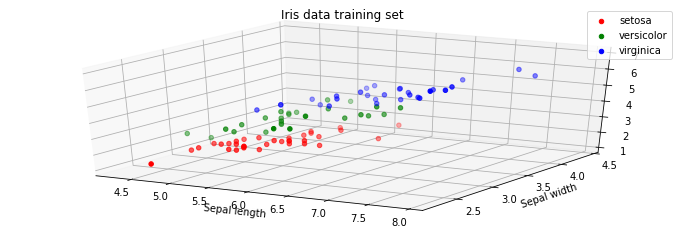

In [50]:
# 데이터 시각화 하기(1)-Training dataset
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


y_train_pred=log_reg.predict(X_train)
correct_train_index=y_train_pred==y_train
false_train_index=y_train_pred!=y_train

y_test_pred=log_reg.predict(X_test)
correct_test_index=y_test_pred==y_test
false_test_index=y_test_pred!=y_test


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

plt.rcParams["figure.figsize"]=(12,4)
ax.scatter(X_train[y_train==0,0],X_train[y_train==0,1],X_train[y_train==0,2],c='r',label='setosa')
ax.scatter(X_train[y_train==1,0],X_train[y_train==1,1],X_train[y_train==1,2],c='g',label='versicolor')
ax.scatter(X_train[y_train==2,0],X_train[y_train==2,1],X_train[y_train==2,2],c='b',label='virginica')

plt.legend(),plt.grid(),plt.xlabel('Sepal length'),plt.ylabel('Sepal width'), plt.title('Iris data training set')


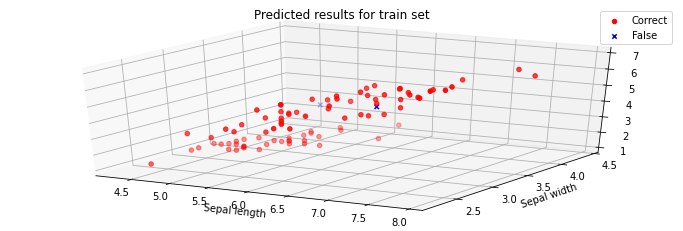

In [52]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[correct_train_index,0],X_train[correct_train_index,1],X_train[correct_train_index,2],\
                                                                                 c='r',marker='o',label='Correct')
ax.scatter(X_train[false_train_index,0],X_train[false_train_index,1],X_train[false_train_index,2],\
           c='b',marker='x',label='False')
plt.legend(),plt.grid(),plt.xlabel('Sepal length'),plt.ylabel('Sepal width'),plt.title('Predicted results for train set')
plt.show()

In [53]:
# 성능 평가
print("Training set performance:",log_reg.score(X_train,y_train))
print("Test set performance:",log_reg.score(X_test,y_test))

Training set performance: 0.9777777777777777
Test set performance: 0.9


(Text(0.5, 0, 'Sepal length'),
 Text(0.5, 0, 'Sepla width'),
 None,
 Text(0.5, 0.92, 'Iris data test set'))

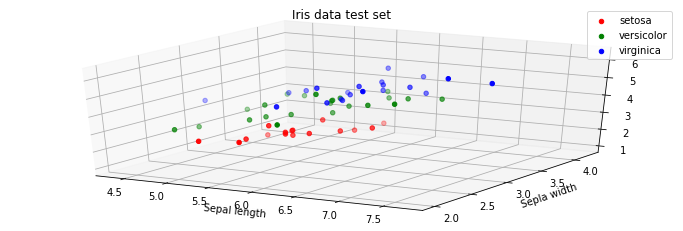

In [54]:
# 데이터 시각화 하기(2)-Test dataset
y_train_pred=log_reg.predict(X_train)
correct_train_index=y_train_pred==y_train
false_train_index=y_train_pred!=y_train

y_test_pred=log_reg.predict(X_test)
correct_test_index=y_test_pred==y_test
false_test_index=y_test_pred!=y_test

plt.rcParams["figure.figsize"]=(12,4)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[y_test==0,0],X_test[y_test==0,1],X_test[y_test==0,2],c='r',label='setosa')
ax.scatter(X_test[y_test==1,0],X_test[y_test==1,1],X_test[y_test==1,2],c='g',label='versicolor')
ax.scatter(X_test[y_test==2,0],X_test[y_test==2,1],X_test[y_test==2,2],c='b',label='virginica')
plt.xlabel('Sepal length'),plt.ylabel('Sepla width'),plt.grid(),plt.legend(),plt.title('Iris data test set')


Text(0.5, 0.92, 'Predicted results for test set')

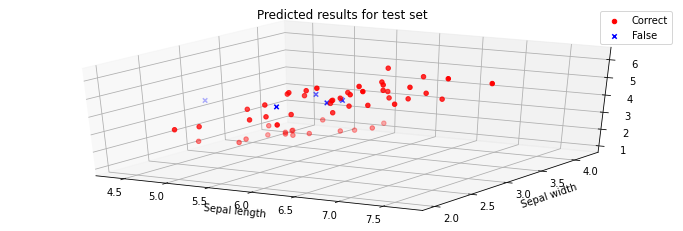

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[correct_test_index,0],X_test[correct_test_index,1],X_test[correct_test_index,2]
           ,c='r',marker='o',label='Correct')
ax.scatter(X_test[false_test_index,0],X_test[false_test_index,1],X_test[false_test_index,2],
           c='b',marker='x',label='False')
plt.xlabel('Sepal length'),plt.ylabel('Sepal width'),plt.grid(),plt.legend()
plt.title('Predicted results for test set')

In [56]:
# 성능 평가
print("Training set performance:",log_reg.score(X_train,y_train))
print("Test set performance:",log_reg.score(X_test,y_test))

Training set performance: 0.9777777777777777
Test set performance: 0.9
